# Exploration18. 문자를 읽을 수 있는 딥러닝

## Step1. 검증용 데이터셋 준비

다양한 특징에 따라서 얼마나 정확하게 문자를 detect하고 recognize 하는지 검증하기 위해서 다양한 이미지를 준비

In [54]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

from glob import glob

In [ ]:
image_dir = os.getenv('HOME')+'/aiffel/ocr_python/imlist/'
image_list = glob(image_dir + '*.jpg')
image_list.sort()
image_list

In [55]:
image_dir = os.getenv('HOME')+'/aiffel/ocr_python/imlist/'
image_list = glob(image_dir + '*.jpg')
image_list.sort()
image_list

['/aiffel/aiffel/ocr_python/imlist/word1.jpg',
 '/aiffel/aiffel/ocr_python/imlist/word2.jpg',
 '/aiffel/aiffel/ocr_python/imlist/word3.jpg',
 '/aiffel/aiffel/ocr_python/imlist/word4.jpg',
 '/aiffel/aiffel/ocr_python/imlist/word5.jpg',
 '/aiffel/aiffel/ocr_python/imlist/word6.jpg']

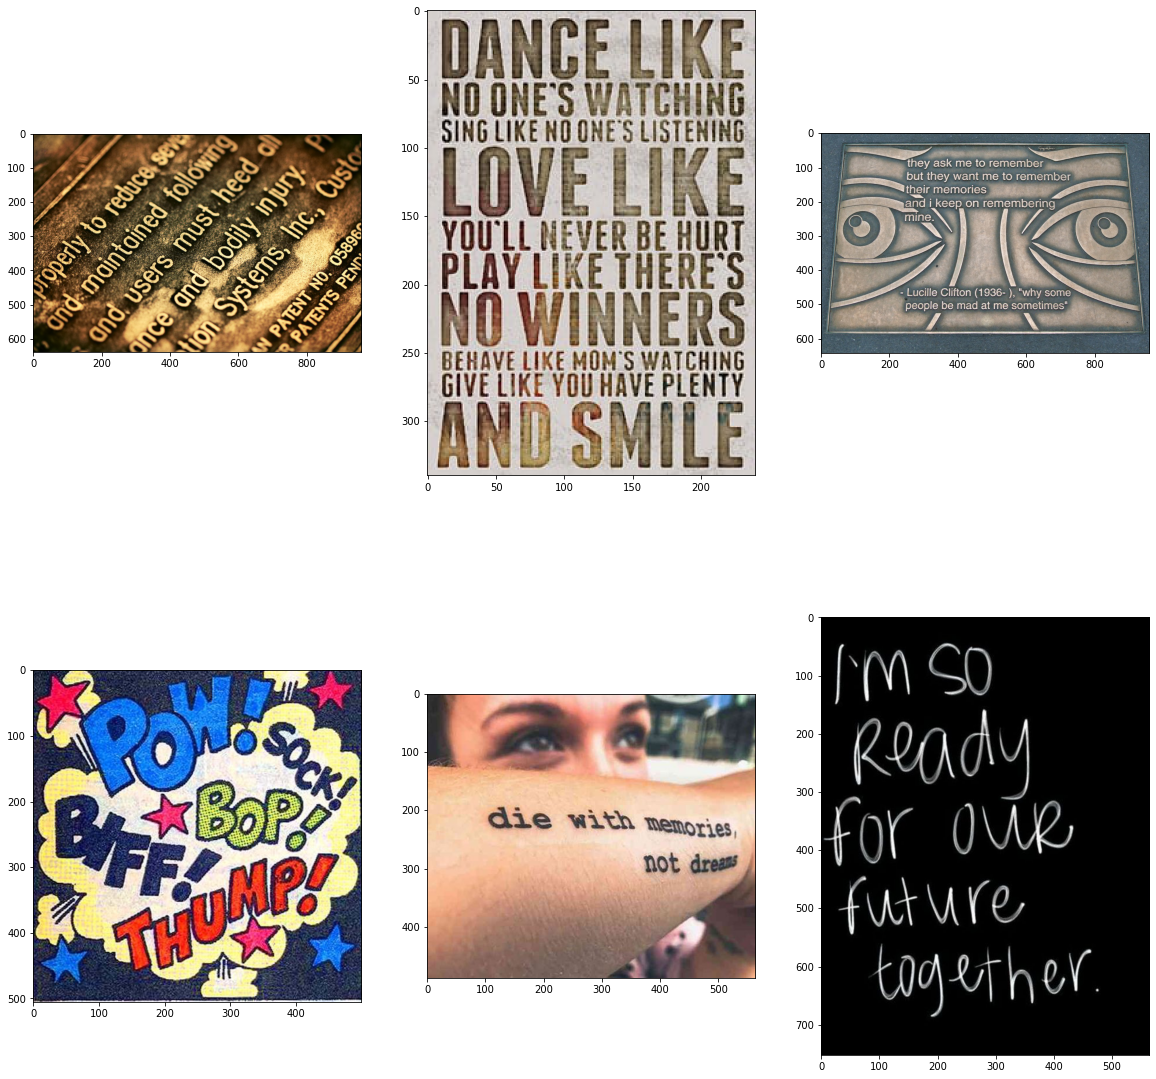

In [56]:
plt.figure(figsize=(20, 20))
for i, j in enumerate(image_list):
    plt.subplot(2, 3, i+1)
    image = img.imread(j)
    plt.imshow(image)

## Step2. keras-ocr, Tesseract로 테스트 진행

### keras-ocr

In [59]:
import matplotlib.pyplot as plt
import keras_ocr

# keras_ocr이 detector과 recognizer를 위한 모델을 자동으로 다운받습니다.
pipeline=keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [60]:
images = [keras_ocr.tools.read(path) for path in image_list]
prediction_groups = [pipeline.recognize([path]) for path in image_list]

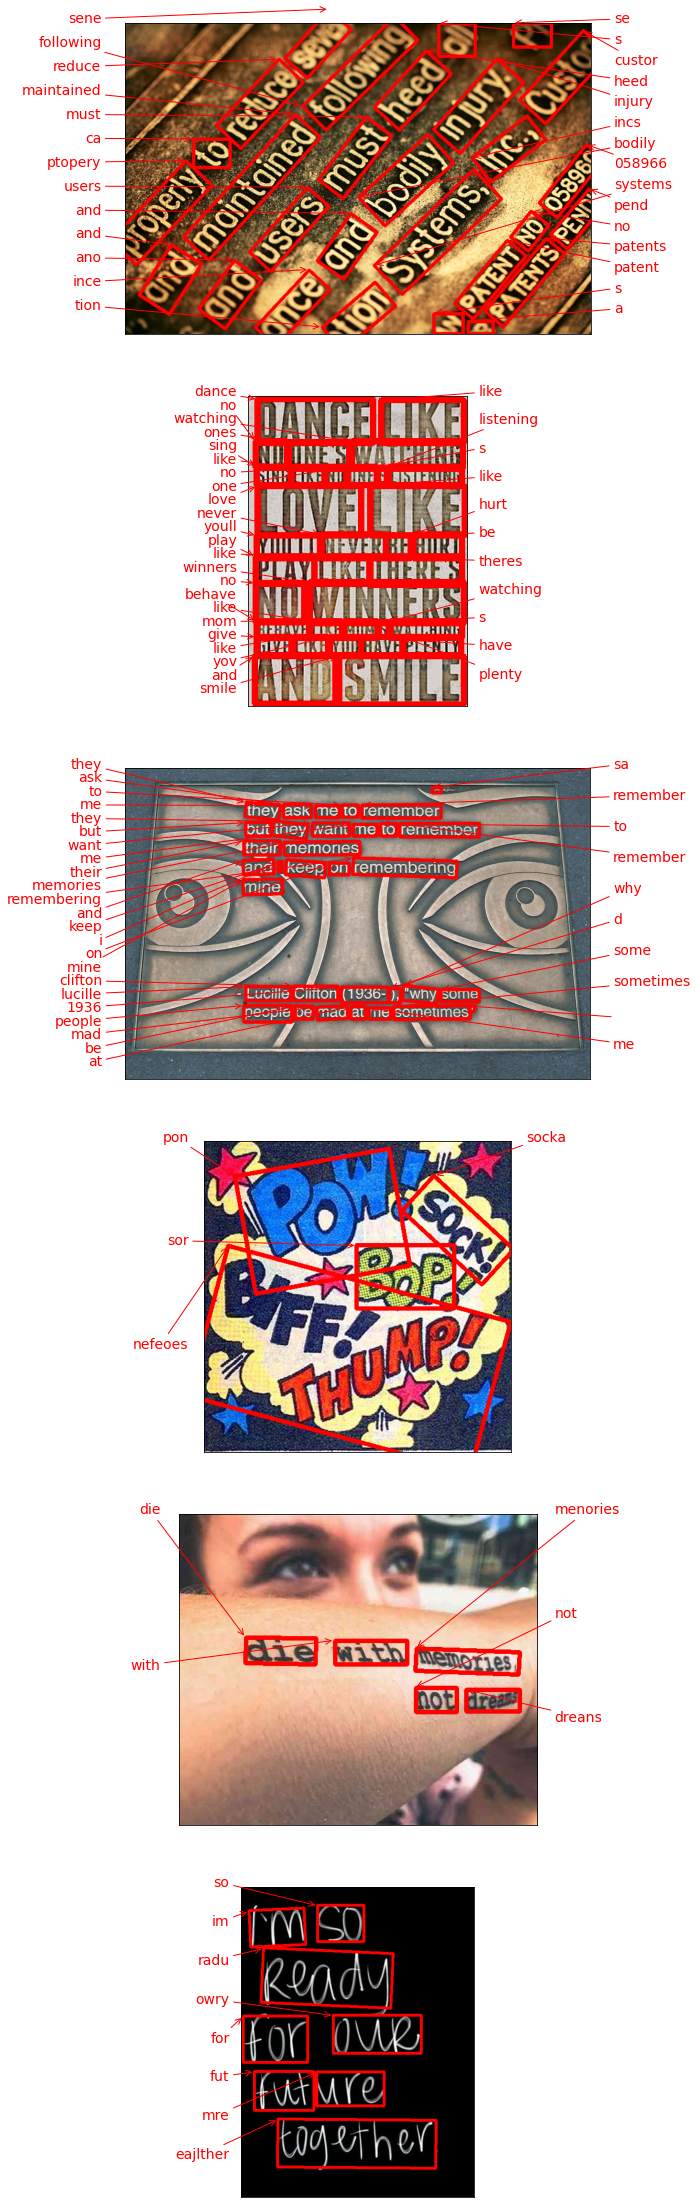

In [67]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(40,40))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx],
                                   predictions=prediction_groups[idx][0], ax=ax)

### Tesseract

In [90]:
import pytesseract
from PIL import Image
from pytesseract import Output

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    try:
        if not os.path.exists(output_path):
            os.mkdir(output_path)
        custom_oem_psm_config = r'--oem 3 --psm 3'
        image = Image.open(image_path)

        recognized_data = pytesseract.image_to_data(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )

        top_level = max(recognized_data['level'])
        index = 0
        cropped_image_path_list = []
        for i in range(len(recognized_data['level'])):
            level = recognized_data['level'][i]

            if level == top_level:
                left = recognized_data['left'][i]
                top = recognized_data['top'][i]
                width = recognized_data['width'][i]
                height = recognized_data['height'][i]
                output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
                cropped_image = image.crop((
                    left,
                    top,
                    left+width,
                    top+height
                ))
                cropped_image.save(output_img_path)
                cropped_image_path_list.append(output_img_path)
                index += 1
        return cropped_image_path_list
    except SystemError as e:
        print(e)

In [92]:
image_list

['/aiffel/aiffel/ocr_python/imlist/word1.jpg',
 '/aiffel/aiffel/ocr_python/imlist/word2.jpg',
 '/aiffel/aiffel/ocr_python/imlist/word3.jpg',
 '/aiffel/aiffel/ocr_python/imlist/word4.jpg',
 '/aiffel/aiffel/ocr_python/imlist/word5.jpg',
 '/aiffel/aiffel/ocr_python/imlist/word6.jpg']

In [95]:
work_dir = os.getenv('HOME')+'/aiffel/ocr_python/imlist/output'

cropped_image_path_list = {}
for i, img in enumerate(image_list):
    dir_path = work_dir + f'/{i}'
    path_list = crop_word_regions(img, dir_path)
    cropped_image_path_list[i] = path_list

tile cannot extend outside image


In [96]:
cropped_image_path_list

{0: None,
 1: ['/aiffel/aiffel/ocr_python/imlist/output/1/0000.png'],
 2: ['/aiffel/aiffel/ocr_python/imlist/output/2/0000.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0001.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0002.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0003.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0004.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0005.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0006.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0007.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0008.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0009.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0010.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0011.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0012.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0013.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0014.png',
  '/aiffel/aiffel/ocr_python/imlist/output/2/0015.png',
  '/aiffel/aiffel/ocr_python/im

In [97]:
def recognize_images(i, cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    print(f'>>>>>>>>>>>>>>>>>>>>>>>>>>>>{i}>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    result = ''
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        result += " ".join(recognized_data['text'].split()) + " "
    print(result)
    print()

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
for key, value in cropped_image_path_list.items():
    if value:
        recognize_images(key, value)

>>>>>>>>>>>>>>>>>>>>>>>>>>>>1>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>2>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
        ce la a ll tae ——— —_—— a4   tney ahs 4 me fe reememper Ree cs 7 | eer! tney want gals 1O remember  - Pl taltlg wey >. ; sores 's  ! ea O) remempbs Se : 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>3>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
 

>>>>>>>>>>>>>>>>>>>>>>>>>>>>4>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
7 o> Aaa NOt ares  

>>>>>>>>>>>>>>>>>>>>>>>>>>>>5>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
SR Oe ane 



In [102]:
# 3번 시각화용 print문 제거
def recognize_images_result(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    result = ''
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        result += " ".join(recognized_data['text'].split()) + " "
    print(result)

## Step3. 테스트 결과 정리

In [103]:
import time

plt.figure(figsize=(50, 50))
for i, im in enumerate(image_list):
    print(f'{i}번째 이미지 결과 >>>>>>>>')
#     plt.subplot(10, 1, i+1)
#     image = img.imread(im)
#     plt.imshow(image)
#     time.sleep(3)
    print('<keras-ocr>')
    keras_ocr_result = [txt[0] for txt in prediction_groups[i][0]]
    keras_ocr_result = ' '.join(keras_ocr_result)
    print(keras_ocr_result)
    print('<Tesseract>')
    if cropped_image_path_list[i]:
        recognize_images_result(cropped_image_path_list[i])
    print()

0번째 이미지 결과 >>>>>>>>
<keras-ocr>
sene se s following custor heed reduce injury maintained must incs ca bodily 058966 ptopery systems pend users no and patents patent and ano ince tion s a
<Tesseract>

1번째 이미지 결과 >>>>>>>>
<keras-ocr>
dance like no watching ones sing like no one s listening love like never hurt youll be play like theres winners no behave like mom s watching give like yov have plenty and smile
<Tesseract>
 

2번째 이미지 결과 >>>>>>>>
<keras-ocr>
sa they ask to remember me but they want to remember me their memories and i keep remembering on mine clifton lucille why 1936 d some  people be mad sometimes at me
<Tesseract>
        ce la a ll tae ——— —_—— a4   tney ahs 4 me fe reememper Ree cs 7 | eer! tney want gals 1O remember  - Pl taltlg wey >. ; sores 's  ! ea O) remempbs Se : 

3번째 이미지 결과 >>>>>>>>
<keras-ocr>
pon socka sor nefeoes
<Tesseract>
 

4번째 이미지 결과 >>>>>>>>
<keras-ocr>
die with menories not dreans
<Tesseract>
7 o> Aaa NOt ares  

5번째 이미지 결과 >>>>>>>>
<keras-ocr>
so im ra

<Figure size 3600x3600 with 0 Axes>

## Step4. 결과 분석과 결론 제시

생각보다 글자 인식을 잘 못하는것 같다.  
구글 API는 사용 안해봤는데 다른 싸이트를 참고해 보니까 구글이 짱인것 같다.